# Perceptrón desde cero + Clasificador de Créditos

En este notebook vamos a:

1. Recordar qué es un perceptrón.
2. Implementarlo desde cero con Python.
3. Entrenarlo con un conjunto de datos históricos de créditos (`creditos.csv`).
4. Evaluar qué tan bien aprende a decidir.


## 1. ¿Qué es un perceptrón?

Un perceptrón es una pequeña unidad que toma varias entradas numéricas, las combina y decide entre dos salidas posibles: 0 o 1.

Idea básica:

- Cada entrada tiene una **importancia** (peso).
- Hay un **sesgo** (bias) que inclina la decisión.
- Se calcula una suma ponderada:
  
  $z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$

- Si `z >= 0` → salida = 1  
- Si `z < 0` → salida = 0

La gracia: los pesos y el sesgo se pueden **aprender** a partir de ejemplos.


In [ ]:
import random

class Perceptron:
    def __init__(self, entradas, aprendizaje=0.1):
        # Pesos iniciales al azar (pequeños)
        self.pesos = [random.uniform(-1, 1) for _ in range(entradas)]
        self.sesgo = random.uniform(-1, 1)
        self.aprendizaje = aprendizaje

    def activar(self, suma):
        # Función escalón
        return 1 if suma >= 0 else 0

    def predecir(self, x):
        # x es una lista [x1, x2, ..., xn]
        suma = 0.0
        for xi, wi in zip(x, self.pesos):
            suma += xi * wi
        suma += self.sesgo
        return self.activar(suma)

    def entrenar(self, datos, epochs=30, verbose=False):
        """
        datos: lista de (entradas, etiqueta)
        entradas: [x1, x2, ..., xn]
        etiqueta: 0 o 1
        """
        for epoch in range(epochs):
            errores = 0
            for entradas, etiqueta_real in datos:
                prediccion = self.predecir(entradas)
                error = etiqueta_real - prediccion

                if error != 0:
                    # Ajuste de pesos y sesgo
                    self.pesos = [
                        w + self.aprendizaje * error * x
                        for w, x in zip(self.pesos, entradas)
                    ]
                    self.sesgo += self.aprendizaje * error
                    errores += 1

            if verbose:
                print(f"Epoch {epoch}: errores = {errores}")

            if errores == 0:
                break



In [1]:
# Visualizar algunos ejemplos generados
import pandas as pd
datos = pd.read_csv("50.3.creditos.csv")
df = pd.DataFrame(datos)
print("\n📋 Primeros 10 registros:")
print(df.head(10))

print("\n📊 Estadísticas descriptivas:")
print(df.describe())

# Ver correlación entre variables
print("\n🔗 Correlación con 'aprobo_bien':")
print(df.corr()['aprobo_bien'].sort_values(ascending=False))

ModuleNotFoundError: No module named 'pandas'

## 2. Dataset de créditos

Vamos a usar un archivo `creditos.csv` (ya preparado) que tiene columnas:

- `ingreso_mensual`
- `antiguedad_meses`
- `tuvo_morosidad` (0 = no, 1 = sí)
- `aprobo_bien` (1 = buen cliente histórico, 0 = mal cliente)

Objetivo: que el perceptrón aprenda a predecir `aprobo_bien` usando las otras columnas.


In [12]:
import csv

def cargar_datos_credito(ruta_csv):
    datos = []
    with open(ruta_csv, newline='', encoding='utf-8') as f:
        lector = csv.DictReader(f)
        for fila in lector:
            ingreso = float(fila["ingreso_mensual"])
            antig = float(fila["antiguedad_meses"])
            morosidad = float(fila["tuvo_morosidad"])
            etiqueta = int(fila["aprobo_bien"])

            x = [ingreso, antig, morosidad]
            y = etiqueta
            datos.append((x, y))
    return datos

def normalizar_datos(datos):
    datos_norm = []
    for x, y in datos:
        ingreso = x[0] / 1_000_000   # escala: de pesos a algo manejable
        antig = x[1] / 120           # suponemos máx ~10 años
        morosidad = x[2]             # ya es 0 o 1
        x_norm = [ingreso, antig, morosidad]
        datos_norm.append((x_norm, y))
    return datos_norm

datos = cargar_datos_credito("./50.3-creditos.csv")
datos = normalizar_datos(datos)
len(datos), datos[0]


(200, ([0.517717, 0.041666666666666664, 0.0], 0))

In [13]:
import random

def train_test_split(datos, proporcion_train=0.8):
    datos_barajados = datos[:]
    random.shuffle(datos_barajados)
    corte = int(len(datos_barajados) * proporcion_train)
    train = datos_barajados[:corte]
    test = datos_barajados[corte:]
    return train, test

train, test = train_test_split(datos, proporcion_train=0.8)
len(train), len(test)


(160, 40)

In [14]:
modelo = Perceptron(n_entradas=3, tasa_aprendizaje=0.1)
modelo.entrenar(train, epochs=50, verbose=True)

# Precisión en train
aciertos_train = sum(1 for x, y in train if modelo.predecir(x) == y)
prec_train = aciertos_train / len(train)

# Precisión en test
aciertos_test = sum(1 for x, y in test if modelo.predecir(x) == y)
prec_test = aciertos_test / len(test)

print(f"Precisión en entrenamiento: {prec_train:.2f}")
print(f"Precisión en prueba: {prec_test:.2f}")
print("Pesos:", modelo.pesos, "Sesgo:", modelo.sesgo)


Epoch 0: errores = 46
Epoch 1: errores = 39
Epoch 2: errores = 40
Epoch 3: errores = 38
Epoch 4: errores = 38
Epoch 5: errores = 34
Epoch 6: errores = 38
Epoch 7: errores = 36
Epoch 8: errores = 38
Epoch 9: errores = 32
Epoch 10: errores = 38
Epoch 11: errores = 36
Epoch 12: errores = 36
Epoch 13: errores = 38
Epoch 14: errores = 40
Epoch 15: errores = 34
Epoch 16: errores = 36
Epoch 17: errores = 38
Epoch 18: errores = 38
Epoch 19: errores = 34
Epoch 20: errores = 36
Epoch 21: errores = 38
Epoch 22: errores = 38
Epoch 23: errores = 34
Epoch 24: errores = 36
Epoch 25: errores = 38
Epoch 26: errores = 38
Epoch 27: errores = 34
Epoch 28: errores = 36
Epoch 29: errores = 38
Epoch 30: errores = 38
Epoch 31: errores = 34
Epoch 32: errores = 36
Epoch 33: errores = 36
Epoch 34: errores = 38
Epoch 35: errores = 38
Epoch 36: errores = 38
Epoch 37: errores = 32
Epoch 38: errores = 38
Epoch 39: errores = 38
Epoch 40: errores = 38
Epoch 41: errores = 38
Epoch 42: errores = 32
Epoch 43: errores = 3

## 3. Interpretación

- El perceptrón intenta imitar las decisiones históricas.
- La precisión en entrenamiento muestra qué tanto copió el pasado.
- La precisión en prueba muestra qué tan bien generaliza a casos nuevos.

Si la precisión en prueba es razonable, la neurona aprendió una regla simple útil.


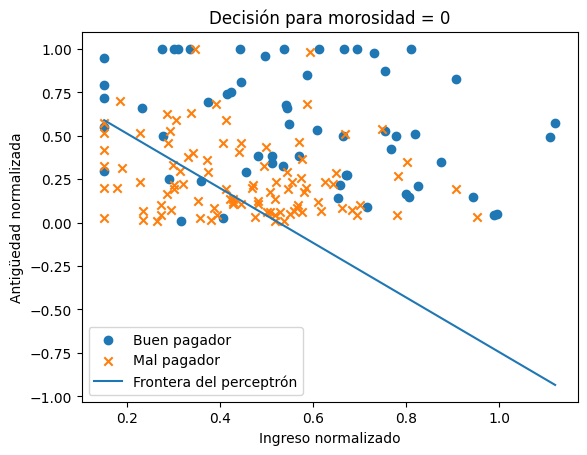

In [15]:
import matplotlib.pyplot as plt

def graficar_decision(modelo, datos, morosidad_fija=0):
    xs_buenos, ys_buenos = [], []
    xs_malos, ys_malos = [], []

    for x, y in datos:
        ingreso, antig, morosidad = x
        if abs(morosidad - morosidad_fija) > 1e-6:
            continue

        if y == 1:
            xs_buenos.append(ingreso)
            ys_buenos.append(antig)
        else:
            xs_malos.append(ingreso)
            ys_malos.append(antig)

    if xs_buenos or xs_malos:
        plt.scatter(xs_buenos, ys_buenos, marker='o', label='Buen pagador')
        plt.scatter(xs_malos, ys_malos, marker='x', label='Mal pagador')

        if len(modelo.pesos) == 3:
            w_ing, w_ant, w_mor = modelo.pesos
            b = modelo.sesgo
            if abs(w_ant) > 1e-8:
                xs_linea = [min(xs_buenos + xs_malos), max(xs_buenos + xs_malos)]
                ys_linea = []
                for xx in xs_linea:
                    yy = -(w_ing / w_ant) * xx - (w_mor * morosidad_fija + b) / w_ant
                    ys_linea.append(yy)
                plt.plot(xs_linea, ys_linea, label='Frontera del perceptrón')

        plt.xlabel("Ingreso normalizado")
        plt.ylabel("Antigüedad normalizada")
        plt.title(f"Decisión para morosidad = {morosidad_fija}")
        plt.legend()
        plt.show()
    else:
        print("No hay datos con morosidad_fija =", morosidad_fija)

graficar_decision(modelo, datos, morosidad_fija=0)
